___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [6]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train[1903].shape

(28, 28)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [5]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

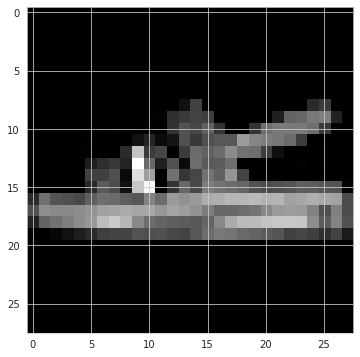

In [7]:
plt.imshow(X_train[1903],cmap='gray')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app


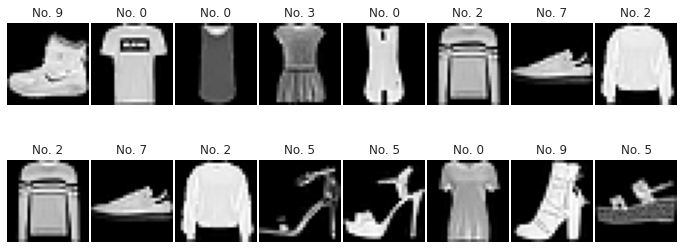

In [8]:
num_rows, num_cols = 2, 8
f, ax = plt.subplots(2, 8, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')
       
        
plt.tight_layout()
plt.show()
plt.close()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [9]:
X_train[1903].min()

0

In [10]:
X_train[1903].max()

255

In [11]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print (X_train.shape)
print (X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [12]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [16]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [18]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [19]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [17]:
from tensorflow.keras.utils import to_categorical

In [21]:
# one hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [24]:
model = Sequential()
model.add(Conv2D(28, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
	

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4732)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               605824    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [28]:
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test,y_test)) 


Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.3781 - accuracy: 0.8666 - val_loss: 0.3137 - val_accuracy: 0.8875
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2549 - accuracy: 0.9065 - val_loss: 0.2753 - val_accuracy: 0.9012
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2138 - accuracy: 0.9207 - val_loss: 0.2744 - val_accuracy: 0.9014
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1812 - accuracy: 0.9320 - val_loss: 0.2718 - val_accuracy: 0.9079
Epoch 5/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1542 - accuracy: 0.9425 - val_loss: 0.2783 - val_accuracy: 0.9060
Epoch 6/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1321 - accuracy: 0.9510 - val_loss: 0.2707 - val_accuracy: 0.9131
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1135 - accuracy: 0.9577 - val_loss: 0.2909 -

**TASK 7: Plot values of metrics you used in your model.**

In [29]:
pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.378,0.867,0.314,0.887
1,0.255,0.907,0.275,0.901
2,0.214,0.921,0.274,0.901
3,0.181,0.932,0.272,0.908
4,0.154,0.942,0.278,0.906
5,0.132,0.951,0.271,0.913
6,0.114,0.958,0.291,0.914
7,0.097,0.964,0.307,0.910
8,0.083,0.969,0.322,0.914
9,0.073,0.972,0.337,0.915


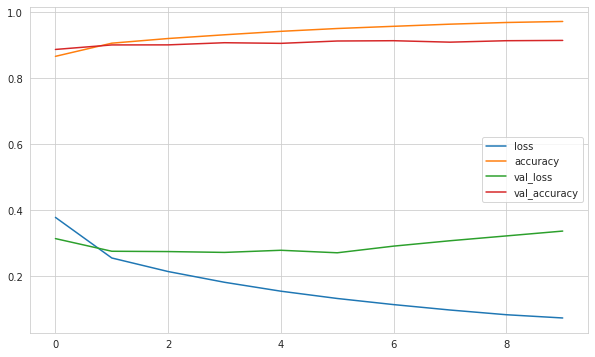

In [30]:
pd.DataFrame(model.history.history).plot()

In [31]:
model_2 = Sequential()
model_2.add(Conv2D(28, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_2.add(MaxPool2D((2, 2)))
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_2.add(Dense(10, activation='softmax'))
# compile model

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
	




In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor='val_accuracy',mode="max", patience=5, restore_best_weights = True)

In [36]:
model_2.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test,y_test),callbacks=[early_stop]) 


Epoch 1/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3717 - accuracy: 0.8678 - val_loss: 0.2942 - val_accuracy: 0.8940
Epoch 2/20
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2487 - accuracy: 0.9087 - val_loss: 0.2848 - val_accuracy: 0.9014
Epoch 3/20
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2062 - accuracy: 0.9229 - val_loss: 0.2605 - val_accuracy: 0.9033
Epoch 4/20
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1731 - accuracy: 0.9347 - val_loss: 0.2560 - val_accuracy: 0.9119
Epoch 5/20
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1461 - accuracy: 0.9454 - val_loss: 0.2702 - val_accuracy: 0.9097
Epoch 6/20
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1247 - accuracy: 0.9539 - val_loss: 0.2655 - val_accuracy: 0.9145
Epoch 7/20
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1051 - accuracy: 0.9603 - val_loss: 0.2863 -

In [37]:
pd.DataFrame(model_2.history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.372,0.868,0.294,0.894
1,0.249,0.909,0.285,0.901
2,0.206,0.923,0.261,0.903
3,0.173,0.935,0.256,0.912
4,0.146,0.945,0.270,0.910
5,0.125,0.954,0.266,0.914
6,0.105,0.960,0.286,0.910
7,0.090,0.967,0.290,0.915
8,0.075,0.972,0.320,0.915
9,0.063,0.977,0.331,0.913


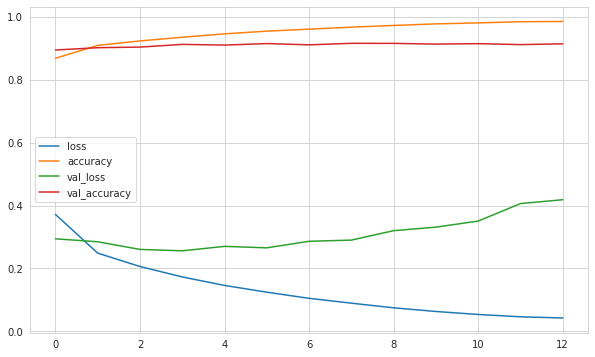

In [38]:
pd.DataFrame(model_2.history.history).plot()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [39]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [41]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3366 - accuracy: 0.9149


[0.33657151460647583, 0.914900004863739]

In [48]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.33657151460647583
Test accuracy: 0.914900004863739


In [67]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)


[[831   1  25  15   6   1 117   0   4   0]
 [  0 980   1  11   4   0   2   0   2   0]
 [ 11   0 873   6  47   0  62   0   1   0]
 [  8   7  14 919  19   0  29   0   4   0]
 [  0   1  62  29 862   0  45   0   1   0]
 [  0   0   0   0   0 970   0  23   0   7]
 [ 64   0  48  25  54   0 801   0   8   0]
 [  0   0   0   0   0   6   0 982   1  11]
 [  4   0   3   4   1   2   4   4 978   0]
 [  0   0   0   0   0   4   1  42   0 953]]


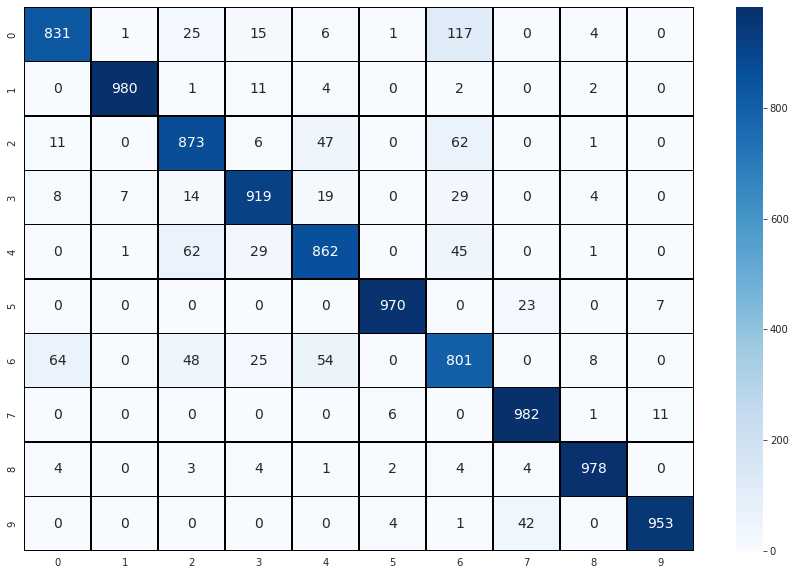

In [69]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.87      0.86      1000
           3       0.91      0.92      0.91      1000
           4       0.87      0.86      0.87      1000
           5       0.99      0.97      0.98      1000
           6       0.75      0.80      0.78      1000
           7       0.93      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.92     10000
weighted avg       0.92      0.91      0.92     10000



## Prediction

In [72]:
my_number = X_test[1903]
my_number.shape

(28, 28, 1)

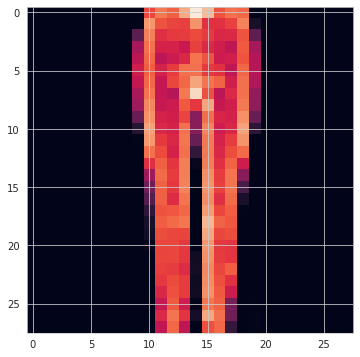

In [73]:
plt.imshow(my_number.reshape(28,28));

In [74]:
pred_prob = model.predict(my_number.reshape(1,28,28,1))
pred_prob

array([[2.8154568e-10, 1.0000000e+00, 5.5867010e-14, 5.0510598e-12,
        1.6951157e-13, 3.7654705e-18, 2.3954073e-13, 2.2795068e-23,
        9.5254513e-15, 5.7633406e-17]], dtype=float32)

In [75]:
y_pred = np.argmax(pred_prob)
y_pred

1

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___